# Analyse data

# Individual Quizes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.set(style="white", color_codes=True)
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
q1 = np.load('scores/Pre_Quiz_Scores.npy', allow_pickle=True).item()
q2 = np.load('scores/Final_Quiz_Scores.npy', allow_pickle=True).item()
q3 = np.load('scores/Map_Scores.npy', allow_pickle=True).item()

In [3]:
students = list(q1.keys())
data = {"student": list(q1.keys()), 
        "pre_quiz": [q1[x][0] for x in students],
        "pre_quiz_norm": [q1[x][1] for x in students],
        "post_quiz": [q2[x][0] for x in students],
        "post_quiz_norm": [q2[x][1] for x in students],
        "map_quiz": [q3[x][0] for x in students],
        "map_quiz_norm": [q3[x][1] for x in students],}
df_students = pd.DataFrame(data)

In [4]:
print(df_students.shape)
df_students

(20, 7)


,student,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm
0,oriane_peter,0,0.000000,6,1.000000,2,0.666667
1,thanuditha_wickramasinghe,2,0.333333,5,0.833333,0,0.000000
2,graziano_rossini,2,0.333333,4,0.666667,2,0.666667
3,alfonso_fernandez,1,0.166667,4,0.666667,2,0.666667
4,marcel_moya,1,0.166667,5,0.833333,2,0.666667
5,lukas_deloose,0,0.000000,5,0.833333,2,0.666667
6,anel_muhamedagic,1,0.166667,5,0.833333,3,1.000000
7,alexandre_thimonier,2,0.333333,4,0.666667,2,0.666667
8,guido_sergi,1,0.166667,5,0.833333,1,0.333333
9,kim_haeeun,2,0.333333,5,0.833333,2,0.666667


In [5]:
df_students.describe()

,pre_quiz,pre_quiz_norm,post_quiz,post_quiz_norm,map_quiz,map_quiz_norm
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.450000,0.241667,4.700000,0.783333,1.950000,0.650000
std,0.887041,0.147840,0.978721,0.163120,0.944513,0.314838
min,0.000000,0.000000,2.000000,0.333333,0.000000,0.000000
25%,1.000000,0.166667,4.000000,0.666667,1.750000,0.583333
50%,1.500000,0.250000,5.000000,0.833333,2.000000,0.666667
75%,2.000000,0.333333,5.000000,0.833333,3.000000,1.000000
max,3.000000,0.500000,6.000000,1.000000,3.000000,1.000000


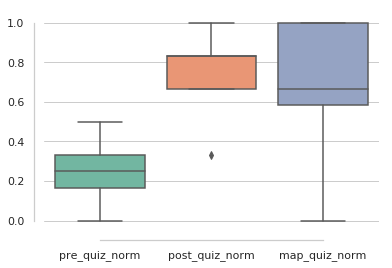

In [6]:
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)

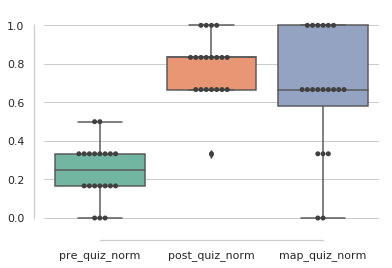

In [7]:
sns.boxplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)
sns.swarmplot(data=df_students[["pre_quiz_norm", "post_quiz_norm", "map_quiz_norm"]], color=".25");

(0, 1)

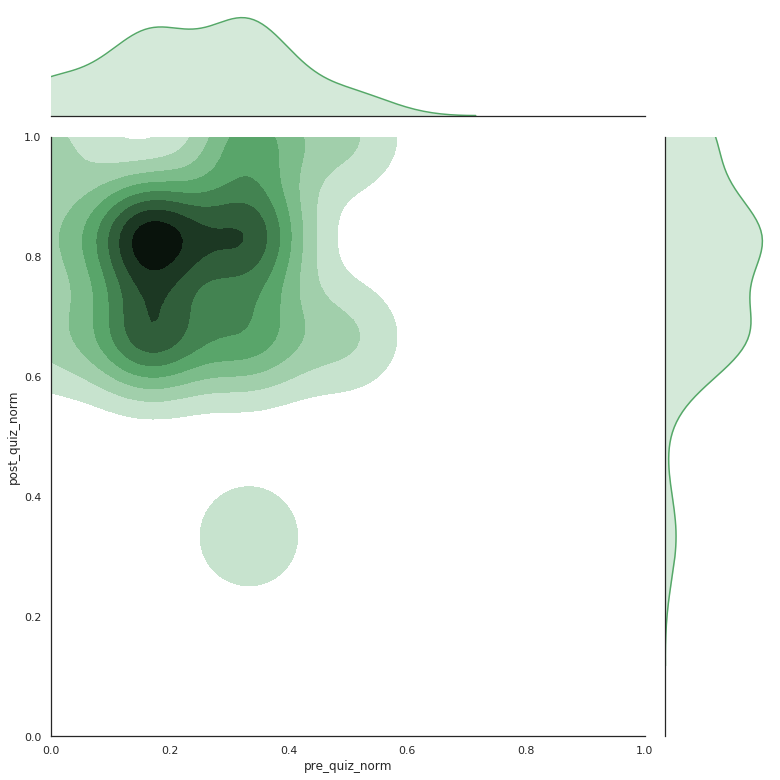

In [37]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="pre_quiz_norm", y="post_quiz_norm", data=df_students, kind="kde", color="g", height=11,joint_kws=dict(shade_lowest=False))  # "reg", "kde"
g.ax_marg_x.set_xlim(0, 1)
g.ax_marg_y.set_ylim(0, 1)


---

# Team Quizes

In [9]:
q4 = np.load('scores/DGSM_Scores.npy', allow_pickle=True).item()
q5 = np.load('scores/SGDM_Scores.npy', allow_pickle=True).item()

In [10]:
teams = list(q4.keys())
data = {"team": teams, 
        "DGSM": [q4[x][0] for x in teams],  # 9 questions
        "DGSM_norm": [q4[x][1] for x in teams],
        "SGDM": [q5[x][0] for x in teams],  # 9 questions
        "SGDM_norm": [q5[x][1] for x in teams]}
df_teams = pd.DataFrame(data)
df_teams["total"] = df_teams.apply(lambda x: x["DGSM"]+x["SGDM"], axis=1)
df_teams["total_norm"] = df_teams.apply(lambda x: x["total"]/18, axis=1)

In [11]:
print(df_teams.shape)
df_teams

(9, 7)


,team,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
0,mixed1,7,0.777778,5,0.555556,12,0.666667
1,mixed3,6,0.666667,8,0.888889,14,0.777778
2,mixed4,7,0.777778,7,0.777778,14,0.777778
3,mixed5,6,0.666667,8,0.888889,14,0.777778
4,same1,5,0.555556,8,0.888889,13,0.722222
5,same3,4,0.444444,8,0.888889,12,0.666667
6,same4,7,0.777778,7,0.777778,14,0.777778
7,same5,7,0.777778,7,0.777778,14,0.777778
8,mixed2,7,0.777778,8,0.888889,15,0.833333


In [12]:
df_teams.describe()

,DGSM,DGSM_norm,SGDM,SGDM_norm,total,total_norm
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.222222,0.691358,7.333333,0.814815,13.555556,0.753086
std,1.092906,0.121434,1.000000,0.111111,1.013794,0.056322
min,4.000000,0.444444,5.000000,0.555556,12.000000,0.666667
25%,6.000000,0.666667,7.000000,0.777778,13.000000,0.722222
50%,7.000000,0.777778,8.000000,0.888889,14.000000,0.777778
75%,7.000000,0.777778,8.000000,0.888889,14.000000,0.777778
max,7.000000,0.777778,8.000000,0.888889,15.000000,0.833333


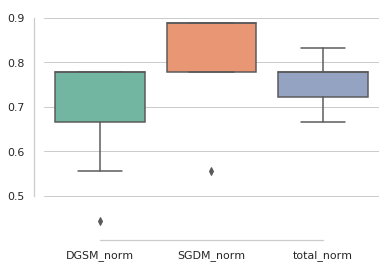

In [13]:
sns.boxplot(data=df_teams[["DGSM_norm", "SGDM_norm", "total_norm"]], orient="w", palette="Set2")
sns.despine(offset=10, trim=True)